# TD 1.2 Prédiction sur des données médicales brutes

Dans ce TD, nous allons enfin faire du vrai apprentissage. Pour cela, nous allons prendre la base classique de *Indian Diabete* (qui n'est pas sur le diabète des Indiens, mais sur les données d'une compagnie d'assurance aux US qui porte ce nom).

Nous avons en entrée un table de 9 valeurs, dont les 8 premières colonnes correspondent aux données biologiques des patients et la dernière colonne correspond à la sortie à prédire (diabète / Pas diabète).

- Chargez la table et affichez les trois premières lignes

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.preprocessing as skp

# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import Callback

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, :-1]
Y = dataset[:, -1]

## Estimer la distribution des valeurs

- Utilisez, dans la bibliothèque `Pandas` la méthode `violinplot()` permettant d'estimer la distribution des valeurs par colonne. L'idée est d'aider l'apprentissage en explorant l'étendue des valeurs et leurs distributions

268 / 768


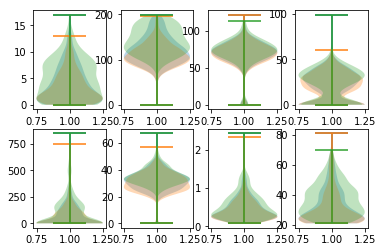

In [9]:
print(int(sum(dataset[:,8])),"/",len(dataset[:,1]))
plt.clf()
ax = []
for i in range(8):
   ax.append(plt.subplot(2,4,i+1))
   ax[-1].violinplot(dataset[:,i])
   ax[-1].violinplot([x[i] for x in dataset if x[8]==0])
   ax[-1].violinplot([x[i] for x in dataset if x[8]==1])


## Matrice de corrélation

- Vérifiez, en utilisant Pandas, que la matrice de corrélation des valeurs ne fait pas apparaître de valeurs en trop (qui seraient corrélées)

Matrice de corrélation


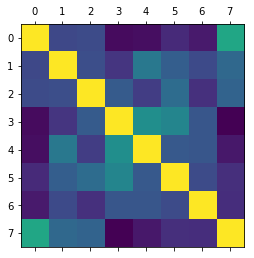

In [10]:
print("Matrice de corrélation")
pdataset = pd.DataFrame(dataset[:,:8]) # panda version of inputs
plt.matshow(pdataset.corr())

## Normalisez les données (par colonne)

- Utilisez la méthode `scale` de scikit learn pour normaliser les données. Représentez de nouveau les violin plots une fois normalisés

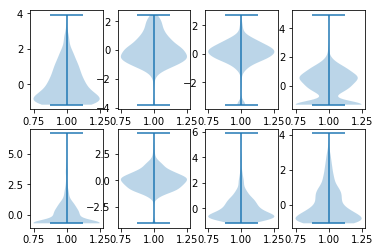

In [11]:
# Normalisation
XNormalized = skp.scale(dataset[:,:8])
for i in range(8):
   ax.append(plt.subplot(2,4,i+1))
   ax[-1].violinplot(XNormalized[:,i])


## Equilibrez les données entre elle

- Comptez le nombre d'exemple suivant le résultat dans la dernière colonne
- Proposez une méthode permettant d'équilibrer les données

In [12]:
# On equilibre la part des 1 et des 0 dans les donnees
nbtofill = int(len(dataset[:,1])-2*int(sum(dataset[:,8])))
print(nbtofill)
toadd = np.matrix([x for x in dataset if x[8]==1])
np.random.shuffle(toadd)
datafilled = np.vstack((dataset,toadd[:nbtofill]))
len(datafilled)
print(int(sum(datafilled[:,8])),"/",len(datafilled[:,1]))
XFilledNormalized = skp.scale(datafilled[:,:8])

232
500 / 1000


## Conception du réseau de neurones

- Proposez un réseau de neurones pour prédire les bonnes valeurs (inutile à ce stade de mettre trop de couches)
- Comptez à la main le nombre de paramètres que la méthode `fit` devra assigner

In [13]:
X = XNormalized[:,0:8]
Y = dataset[:,8]

model = Sequential()
#...
print(model.summary())


ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

## Lancez l'apprentissage !

Utilisez le code ci dessous pour lancer l'apprentissage. Vous pourrez remplacer `X` et `Y` par le nom de vos données

In [7]:
class History(Callback):
    def __init__(self):
        self.history = {}
    def on_epoch_end(self, epoch, logs={}):                                                                                 
        for k,v in logs.items():
            if not k in self.history: self.history[k]=[]
            self.history[k].append(v)
        print(".",end="")
history=[History()]

model.fit(X, Y, epochs=300, batch_size=100,  verbose=0, validation_split=0.33, 
         callbacks=history)


............................................................................................................................................................................................................................................................................................................

## Observez les courbes caractéristiques de l'apprentissage

Utilisez le code suivant pour représenter les courbes de l'apprentissage.


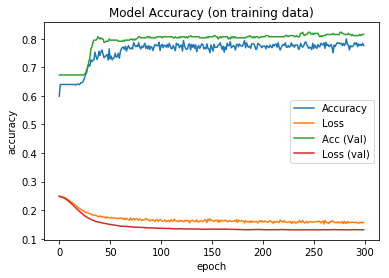

In [8]:
# Model accuracy
plt.plot(history[0].history['acc'])
plt.plot(history[0].history['loss'])
plt.plot(history[0].history['val_acc'])
plt.plot(history[0].history['val_loss'])
plt.title('Model Accuracy (on training data)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss', 'Acc (Val)', 'Loss (val)'])
plt.show()


## Jouez avec les paramètres de l'apprentissage

- Ajoutez des couches et observez les qualités de l'apprentissage
- Ajoutez des couches de `Dropout()`
